# Test if PCA can separate the unique word2vec models

This notebook is designed to see if PCA can tease out unaligned word2vec models.
If it can then I wont have to explain UMAP but use PCA originally to do things.

In [1]:
import itertools
from pathlib import Path
import re

from gensim.models import Word2Vec, KeyedVectors
import numpy as np
import pandas as pd
import plotnine as p9
import plydata as ply
import plydata.tidy as ply_tdy
from sklearn.decomposition import PCA
import tqdm
import umap

# Unaligned Models

## Load the paths for each year

The goal here is to grab the odd years unaligned and see if umap can tease apart odd years.

In [2]:
unaligned_word_models = list(
    Path("../multi_model_experiment/output/models").rglob("*model")
)
unaligned_word_models = sorted(unaligned_word_models, key=lambda x: x.stem)
unaligned_word_model_filter = list(
    filter(lambda x: "2001" in x.stem, unaligned_word_models)
)

In [3]:
word_freq_count_cutoff = 5
odd_year_subset = unaligned_word_model_filter

In [6]:
training_unaligned_word_model_map = dict()
for word_file in tqdm.tqdm(odd_year_subset):
    model = Word2Vec.load(str(word_file)).wv
    training_unaligned_word_model_map[word_file.stem] = dict(
        model=model,
        cutoff_index=min(
            map(
                lambda x: 999999
                if model.wv.vocab[x[1]].count > word_freq_count_cutoff
                else x[0],
                enumerate(model.wv.index2entity),
            )
        ),
    )

  0%|          | 0/10 [00:00<?, ?it/s]/home/danich1/anaconda3/envs/biovectors/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/home/danich1/anaconda3/envs/biovectors/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
 10%|█         | 1/10 [00:00<00:01,  5.04it/s]/home/danich1/anaconda3/envs/biovectors/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/home/danich1/anaconda3/envs/biovectors/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
 20%|██        | 2/10 [00:00<00:03,  2.67it/s]/home/danich1/anaconda3/envs/biovectors/lib/python3.7/site-packages/ipykernel_launcher.py:11: De

In [7]:
words_to_visualize = []
token_character_list = []
year_labels_list = []

In [10]:
for year in tqdm.tqdm(training_unaligned_word_model_map):
    model = training_unaligned_word_model_map[year]["model"]
    word_subset_matrix = model[
        model.wv.index2entity[: training_unaligned_word_model_map[year]["cutoff_index"]]
    ]
    print((year, word_subset_matrix.shape))
    words_to_visualize.append(word_subset_matrix)
    token_character_list += list(
        map(
            lambda x: re.escape(x),
            model.wv.index2entity[
                : training_unaligned_word_model_map[year]["cutoff_index"]
            ],
        )
    )
    year_labels_list += [year] * len(
        model.wv.index2entity[: training_unaligned_word_model_map[year]["cutoff_index"]]
    )

  0%|          | 0/10 [00:00<?, ?it/s]/home/danich1/anaconda3/envs/biovectors/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/home/danich1/anaconda3/envs/biovectors/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/home/danich1/anaconda3/envs/biovectors/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
 60%|██████    | 6/10 [00:00<00:00, 27.97it/s]

('2001_0', (12092, 300))
('2001_1', (12092, 300))
('2001_2', (12092, 300))
('2001_3', (12092, 300))
('2001_4', (12092, 300))
('2001_5', (12092, 300))


100%|██████████| 10/10 [00:00<00:00, 27.91it/s]

('2001_6', (12092, 300))
('2001_7', (12092, 300))
('2001_8', (12092, 300))
('2001_9', (12092, 300))


In [11]:
training_unaligned_words = np.vstack(words_to_visualize)
training_unaligned_words

array([[ 4.31301355e-01,  7.92047009e-02, -3.09807688e-01, ...,
        -2.50414103e-01,  2.29236174e+00, -9.09666181e-01],
       [-1.30043900e+00, -1.23150915e-01,  6.98854625e-01, ...,
         5.68862438e-01,  1.74951100e+00,  1.13868438e-01],
       [-8.33079636e-01, -4.22711045e-01, -1.65444566e-03, ...,
        -2.13459983e-01,  1.12160802e+00, -1.28794801e+00],
       ...,
       [ 6.99581280e-02, -1.26659244e-01, -9.14445519e-02, ...,
         2.79934308e-03, -1.05758876e-01, -6.36764243e-02],
       [ 4.40234095e-02,  1.42163426e-01,  1.70036882e-01, ...,
        -2.16114596e-02,  8.74522403e-02,  3.15937884e-02],
       [-7.63052851e-02,  7.85519704e-02, -2.09962726e-02, ...,
         5.24048461e-03,  9.55198556e-02,  2.17113849e-02]], dtype=float32)

## Run PCA

In [12]:
model = PCA(n_components=2, random_state=100)
embeddings = model.fit_transform(training_unaligned_words)
transformed_df = pd.DataFrame(embeddings, columns=["pca1", "pca2"]) >> ply.define(
    year=year_labels_list, tok=token_character_list
)
transformed_df >> ply.slice_rows(10)

,pca1,pca2,year,tok
0,2.488523,-0.277072,2001_0,\
1,-2.294884,-0.547545,2001_0,the
2,-2.011507,0.477457,2001_0,of
3,0.657323,-2.073163,2001_0,","
4,-1.478790,-0.392996,2001_0,\.
5,0.114987,-0.125881,2001_0,and
6,-0.411530,-2.228736,2001_0,in
7,-0.230475,-2.744177,2001_0,\-
8,-5.067513,-0.852969,2001_0,to
9,-1.466520,0.167860,2001_0,a


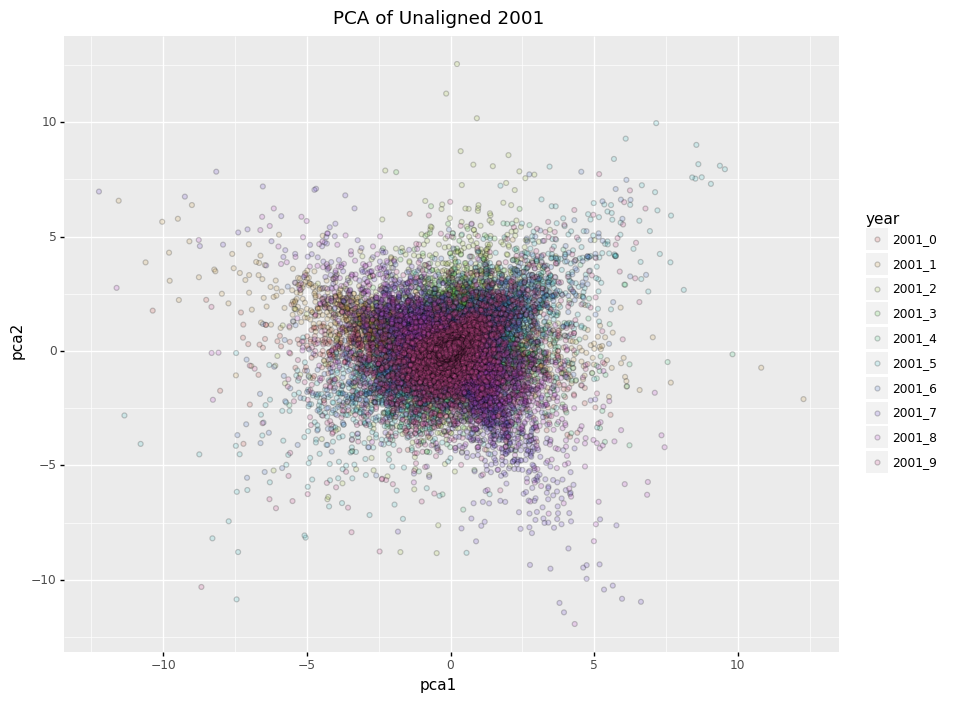

In [13]:
g = (
    p9.ggplot(
        transformed_df >> ply.define(year="pd.Categorical(year)"),
        p9.aes(x="pca1", y="pca2", fill="year"),
    )
    + p9.geom_point(alpha=0.2)
    + p9.labs(title="PCA of Unaligned 2001")
    + p9.theme(figure_size=(10, 8))
)
print(g)

In [14]:
model = umap.parametric_umap.ParametricUMAP(
    verbose=True,
    metric="cosine",
    random_state=100,
    low_memory=True,
    n_neighbors=25,
    min_dist=0.99,
)
embedding = model.fit_transform(training_unaligned_words)

ParametricUMAP(optimizer=<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f57bc7fe9b0>)


/home/danich1/anaconda3/envs/biovectors/lib/python3.7/site-packages/umap/parametric_umap.py:150: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.


Wed Mar  2 17:45:45 2022 Construct fuzzy simplicial set
Wed Mar  2 17:45:45 2022 Finding Nearest Neighbors
Wed Mar  2 17:45:45 2022 Building RP forest with 22 trees
Wed Mar  2 17:45:47 2022 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	Stopping threshold met -- exiting after 4 iterations
Wed Mar  2 17:46:07 2022 Finished Nearest Neighbor Search
Wed Mar  2 17:46:09 2022 Construct embedding
Epoch 1/10
19957/19957 [==============================] - 114s 6ms/step - loss: 0.1631
Epoch 2/10
19957/19957 [==============================] - 112s 6ms/step - loss: 0.0790
Epoch 3/10
19957/19957 [==============================] - 112s 6ms/step - loss: 0.0768
Epoch 4/10
19957/19957 [==============================] - 112s 6ms/step - loss: 0.0757
Epoch 5/10
19957/19957 [==============================] - 112s 6ms/step - loss: 0.0751
Epoch 6/10
19957/19957 [==============================] - 112s 6ms/step - loss: 0.0746
Epoch 7/10
19957/19957 [==============================] - 

In [15]:
transformed_umap_df = pd.DataFrame(embedding, columns=["umap1", "umap2"]) >> ply.define(
    year=year_labels_list, tok=token_character_list
)
transformed_umap_df >> ply.slice_rows(10)

,umap1,umap2,year,tok
0,14.999967,-1.934223,2001_0,\
1,11.684131,-6.494534,2001_0,the
2,11.635917,-6.590775,2001_0,of
3,11.552254,-5.371463,2001_0,","
4,12.615004,-5.775813,2001_0,\.
5,11.608392,-5.500244,2001_0,and
6,12.025063,-4.896485,2001_0,in
7,12.756089,-4.353647,2001_0,\-
8,11.622737,-6.422612,2001_0,to
9,12.117604,-7.751503,2001_0,a


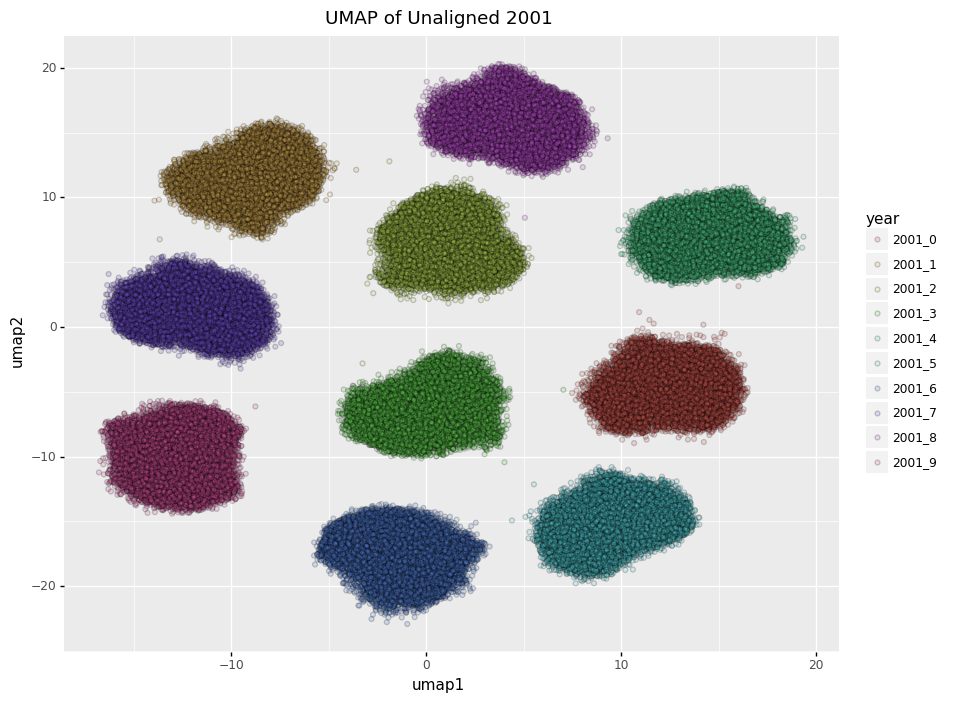

In [16]:
g = (
    p9.ggplot(
        transformed_umap_df >> ply.define(year="pd.Categorical(year)"),
        p9.aes(x="umap1", y="umap2", fill="year"),
    )
    + p9.geom_point(alpha=0.2)
    + p9.labs(title="UMAP of Unaligned 2001")
    + p9.theme(figure_size=(10, 8))
)
print(g)

# Take home messages

1. Unfortunately PCA cannot tease apart years like UMAP can. Therefore, I'll have use UMAP moving forward.